In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

## Preprocessing

In [2]:
with open('AP Visitation header.txt') as f:
    lines = f.read().splitlines() 
    line = lines[0]
    
header = line.split("\t")

df = pd.read_csv('AP Visitation_20201101_20211031.csv', sep=',', header=None)
df.columns = header
df.head()

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times
0,5361,Gold,Adult,<1K,0,2020,11,1
1,6604,Gold,Adult,>1K,0,2021,2,1
2,6604,Gold,Adult,>1K,0,2021,7,1
3,6604,Gold,Adult,>1K,0,2020,12,1
4,6604,Gold,Adult,>1K,0,2021,5,1


In [19]:
df.head(30)

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times
0,5361,Gold,Adult,<1K,0,2020,11,1
1,6604,Gold,Adult,>1K,0,2021,2,1
2,6604,Gold,Adult,>1K,0,2021,7,1
3,6604,Gold,Adult,>1K,0,2020,12,1
4,6604,Gold,Adult,>1K,0,2021,5,1
5,6604,Gold,Adult,>1K,0,2021,8,1
6,6604,Gold,Adult,>1K,0,2021,9,1
7,6604,Gold,Adult,>1K,0,2021,10,1
8,6604,Gold,Adult,>1K,0,2021,1,3
9,6604,Gold,Adult,>1K,0,2021,4,1


In [3]:
select_value = lambda x : list(x)[0]
agg_funcs = {'source_id' : select_value, 'Passtype' : select_value, 'Age' : select_value, 'MerchSpendLevel' : max, 'is_renewal' : max, 'year' : max, 'month' : max, 'visit_times':sum} #spending, year, month not grouped correctly, only temporary processing

In [4]:
df_grouped = df.groupby('source_id', as_index=False).agg(agg_funcs)
df_grouped

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times
0,5361,Gold,Adult,<1K,0,2020,11,1
1,6604,Gold,Adult,>1K,0,2021,12,11
2,7487,Gold,Adult,<1K,1,2021,12,8
3,7914,Gold,Adult,<1K,0,2021,11,4
4,8532,Gold,Adult,<1K,0,2021,11,4
...,...,...,...,...,...,...,...,...
9896,354942,Gold,Adult,<1K,1,2021,12,15
9897,354946,Gold,Adult,<1K,0,2021,10,1
9898,354952,Gold,Adult,>1K,0,2021,12,5
9899,354953,Gold,Adult,>1K,0,2021,12,7


In [5]:
df_cluster_grouped = df_grouped.copy()
df_cluster_grouped = df_cluster_grouped.drop(columns=['Age', 'MerchSpendLevel', 'year', 'month'])
df_cluster_grouped

,source_id,Passtype,is_renewal,visit_times
0,5361,Gold,0,1
1,6604,Gold,0,11
2,7487,Gold,1,8
3,7914,Gold,0,4
4,8532,Gold,0,4
...,...,...,...,...
9896,354942,Gold,1,15
9897,354946,Gold,0,1
9898,354952,Gold,0,5
9899,354953,Gold,0,7


In [20]:
df_cluster_grouped.head(20)

,source_id,Passtype,is_renewal,visit_times
0,5361,Gold,0,1
1,6604,Gold,0,11
2,7487,Gold,1,8
3,7914,Gold,0,4
4,8532,Gold,0,4
5,9702,Gold,0,10
6,9832,Gold,0,10
7,11001,Silver,1,11
8,11099,Diamond,1,11
9,11447,Gold,1,6


In [6]:
df_cluster_dummy = df_cluster_grouped.copy()
df_cluster_dummy = pd.get_dummies(df_cluster_dummy)
df_cluster_dummy

,source_id,is_renewal,visit_times,Passtype_Crystal,Passtype_Diamond,Passtype_Gold,Passtype_Silver
0,5361,0,1,0,0,1,0
1,6604,0,11,0,0,1,0
2,7487,1,8,0,0,1,0
3,7914,0,4,0,0,1,0
4,8532,0,4,0,0,1,0
...,...,...,...,...,...,...,...
9896,354942,1,15,0,0,1,0
9897,354946,0,1,0,0,1,0
9898,354952,0,5,0,0,1,0
9899,354953,0,7,0,0,1,0


# -------------------------------------------------------------------------------------------
## Preprocessing: Updated

In [7]:
with open('AP Visitation header_by day.txt') as f:
    lines = f.read().splitlines() 
    line = lines[0]
    
header = line.split("\t")

df_day = pd.read_csv('AP Visitation_20201101_20211031_by day.csv', sep=',', header=None)
df_day.columns = header
df_day.head()

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,use_time
0,5361,Gold,Adult,<1K,0,2020-11-06 12:01:37.917
1,6604,Gold,Adult,>1K,0,2020-12-11 17:05:15.397
2,6604,Gold,Adult,>1K,0,2021-01-03 10:44:05.687
3,6604,Gold,Adult,>1K,0,2021-01-13 11:47:10.623
4,6604,Gold,Adult,>1K,0,2021-01-28 10:22:03.467


In [8]:
select_value_day = lambda x : list(x)[0]
agg_funcs_day = {'source_id' : select_value, 'Passtype' : select_value, 'Age' : select_value, 'MerchSpendLevel' : max, 'is_renewal' : max, 'use_time':max}

In [9]:
df_grouped_day = df_day.groupby('source_id', as_index=False).agg(agg_funcs_day)
df_grouped_day

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,use_time
0,5361,Gold,Adult,<1K,0,2020-11-06 12:01:37.917
1,6604,Gold,Adult,>1K,0,2021-10-29 17:16:21.100
2,7487,Gold,Adult,<1K,1,2021-10-28 17:39:50.950
3,7914,Gold,Adult,<1K,0,2021-06-27 14:49:40.667
4,8532,Gold,Adult,<1K,0,2021-05-30 14:26:25.833
...,...,...,...,...,...,...
9896,354942,Gold,Adult,<1K,1,2021-10-29 18:06:09.063
9897,354946,Gold,Adult,<1K,0,2021-10-29 10:03:46.057
9898,354952,Gold,Adult,>1K,0,2021-10-07 13:50:44.217
9899,354953,Gold,Adult,>1K,0,2021-10-24 13:51:07.363


In [10]:
df_cluster_grouped_day = df_grouped_day.copy()
df_cluster_grouped_day = df_cluster_grouped_day.drop(columns=['Age', 'MerchSpendLevel'])
df_cluster_grouped_day

,source_id,Passtype,is_renewal,use_time
0,5361,Gold,0,2020-11-06 12:01:37.917
1,6604,Gold,0,2021-10-29 17:16:21.100
2,7487,Gold,1,2021-10-28 17:39:50.950
3,7914,Gold,0,2021-06-27 14:49:40.667
4,8532,Gold,0,2021-05-30 14:26:25.833
...,...,...,...,...
9896,354942,Gold,1,2021-10-29 18:06:09.063
9897,354946,Gold,0,2021-10-29 10:03:46.057
9898,354952,Gold,0,2021-10-07 13:50:44.217
9899,354953,Gold,0,2021-10-24 13:51:07.363


In [11]:
df_time = df_grouped_day.copy()
df_grouped_time = df_time.drop(columns=['Age', 'MerchSpendLevel', 'Passtype', 'is_renewal'])
df_grouped_time

,source_id,use_time
0,5361,2020-11-06 12:01:37.917
1,6604,2021-10-29 17:16:21.100
2,7487,2021-10-28 17:39:50.950
3,7914,2021-06-27 14:49:40.667
4,8532,2021-05-30 14:26:25.833
...,...,...
9896,354942,2021-10-29 18:06:09.063
9897,354946,2021-10-29 10:03:46.057
9898,354952,2021-10-07 13:50:44.217
9899,354953,2021-10-24 13:51:07.363


In [12]:
df_cluster_new = df_cluster_grouped_day.copy()
df_cluster_new_dummy = pd.get_dummies(df_cluster_new, columns=['Passtype'], drop_first=True)
df_cluster_new_dummy

,source_id,is_renewal,use_time,Passtype_Diamond,Passtype_Gold,Passtype_Silver
0,5361,0,2020-11-06 12:01:37.917,0,1,0
1,6604,0,2021-10-29 17:16:21.100,0,1,0
2,7487,1,2021-10-28 17:39:50.950,0,1,0
3,7914,0,2021-06-27 14:49:40.667,0,1,0
4,8532,0,2021-05-30 14:26:25.833,0,1,0
...,...,...,...,...,...,...
9896,354942,1,2021-10-29 18:06:09.063,0,1,0
9897,354946,0,2021-10-29 10:03:46.057,0,1,0
9898,354952,0,2021-10-07 13:50:44.217,0,1,0
9899,354953,0,2021-10-24 13:51:07.363,0,1,0


In [13]:
df_cluster_new_dummy['use_time'] = pd.to_datetime(df_cluster_new_dummy['use_time'])
# df_cluster_new_dummy['use_time'] = df_cluster_new_dummy['use_time'].apply(lambda x: x.value)

In [14]:
df_cluster_new_dummy['use_time'] = df_cluster_new_dummy[['use_time']].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [15]:
df_cluster_new_dummy

,source_id,is_renewal,use_time,Passtype_Diamond,Passtype_Gold,Passtype_Silver
0,5361,0,0.014117,0,1,0
1,6604,0,0.994574,0,1,0
2,7487,1,0.991874,0,1,0
3,7914,0,0.653952,0,1,0
4,8532,0,0.577056,0,1,0
...,...,...,...,...,...,...
9896,354942,1,0.994669,0,1,0
9897,354946,0,0.993750,0,1,0
9898,354952,0,0.933799,0,1,0
9899,354953,0,0.980460,0,1,0


In [17]:
df_cluster_new_dummy.head(50)

,source_id,is_renewal,use_time,Passtype_Diamond,Passtype_Gold,Passtype_Silver
0,5361,0,0.014117,0,1,0
1,6604,0,0.994574,0,1,0
2,7487,1,0.991874,0,1,0
3,7914,0,0.653952,0,1,0
4,8532,0,0.577056,0,1,0
5,9702,0,0.930679,0,1,0
6,9832,0,0.981031,0,1,0
7,11001,1,0.887074,0,0,1
8,11099,1,0.978039,1,0,0
9,11447,1,0.942500,0,1,0


## Hierarchical Clustering (using fcluster)

In [7]:
link_exc_age_spending = linkage(df_cluster_dummy.loc[:, df_cluster_dummy.columns != 'source_id'], method  = "ward")

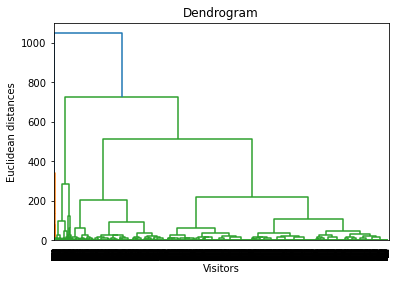

In [8]:
#lastp: The last p non-singleton clusters formed in the linkage are the only non-leaf nodes in the linkage
dendrogram_exc_age_spending = dendrogram(link_exc_age_spending)
plt.title('Dendrogram')
plt.xlabel('Visitors')
plt.ylabel('Euclidean distances')
plt.show()

In [9]:
type(link_exc_age_spending)

numpy.ndarray

In [10]:
#save linkage for later use
link_exc_age_spending_df = pd.DataFrame(link_exc_age_spending)
link_exc_age_spending_df.to_csv('linkage_exc_age_spending_ward.csv')

### d = 3

In [11]:
fcluster_3 = fcluster(link_exc_age_spending, t=3, criterion='distance')
fcluster_3 = pd.DataFrame(fcluster_3)
df_fcluster_3 = df_cluster_grouped.copy()
df_fcluster_3['cluster'] = fcluster_3
df_fcluster_3

,source_id,Passtype,is_renewal,visit_times,cluster
0,5361,Gold,0,1,154
1,6604,Gold,0,11,107
2,7487,Gold,1,8,206
3,7914,Gold,0,4,171
4,8532,Gold,0,4,171
...,...,...,...,...,...
9896,354942,Gold,1,15,132
9897,354946,Gold,0,1,154
9898,354952,Gold,0,5,187
9899,354953,Gold,0,7,198


In [12]:
df_fcluster_3['cluster'].value_counts()

187    358
170    326
171    306
186    304
197    278
      ... 
20       1
13       1
21       1
14       1
11       1
Name: cluster, Length: 206, dtype: int64

In [13]:
#observe clusters (not the best way)
df_merge_d3 = df_grouped.merge(df_fcluster_3[['source_id', 'cluster']], on = 'source_id', how = 'left')
df_merge_d3_sorted = df_merge_d3.sort_values('cluster')
df_merge_d3_sorted.head(10)

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,cluster
1091,59016,Diamond,Adult,>5K,1,2021,12,152,1
2313,251810,Diamond,Adult,>5K,1,2021,12,159,2
3550,262295,Diamond,Adult,>10K,1,2021,12,142,3
3551,262296,Diamond,Adult,>5K,1,2021,12,142,3
6670,278530,Diamond,Adult,>10K,1,2021,12,144,3
3915,264544,Diamond,Adult,>10K,1,2021,12,135,4
1819,247710,Diamond,Adult,>10K,1,2021,12,138,4
262,42479,Diamond,Adult,0,1,2021,12,97,5
1663,72132,Diamond,Adult,>5K,1,2021,10,97,5
2248,251234,Diamond,Adult,>100K,1,2021,12,97,5


In [14]:
#observe clusters (a BETTER way)
df_merge_d3 = df.merge(df_fcluster_3[['source_id', 'cluster']], on = 'source_id', how = 'left')
df_merge_d3_sorted = df_merge_d3.sort_values('cluster')
df_merge_d3_sorted.loc[df_merge_d3_sorted['cluster']==3].sort_values(['source_id', 'year', 'month'])

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,cluster
21202,262295,Diamond,Adult,>10K,1,2020,11,4,3
21200,262295,Diamond,Adult,>10K,1,2020,12,13,3
21196,262295,Diamond,Adult,>10K,1,2021,1,14,3
21204,262295,Diamond,Adult,>10K,1,2021,2,9,3
21201,262295,Diamond,Adult,>10K,1,2021,3,8,3
21205,262295,Diamond,Adult,>10K,1,2021,4,17,3
21197,262295,Diamond,Adult,>10K,1,2021,5,10,3
21194,262295,Diamond,Adult,>10K,1,2021,6,20,3
21195,262295,Diamond,Adult,>10K,1,2021,7,10,3
21198,262295,Diamond,Adult,>10K,1,2021,8,7,3


### d = 1

In [15]:
fcluster_1 = fcluster(link_exc_age_spending, t=1, criterion='distance')
fcluster_1 = pd.DataFrame(fcluster_1)
df_fcluster_1 = df_cluster_grouped.copy()
df_fcluster_1['cluster'] = fcluster_1
df_fcluster_1

,source_id,Passtype,is_renewal,visit_times,cluster
0,5361,Gold,0,1,257
1,6604,Gold,0,11,192
2,7487,Gold,1,8,312
3,7914,Gold,0,4,276
4,8532,Gold,0,4,276
...,...,...,...,...,...
9896,354942,Gold,1,15,227
9897,354946,Gold,0,1,257
9898,354952,Gold,0,5,292
9899,354953,Gold,0,7,304


In [16]:
df_fcluster_1['cluster'].value_counts()

292    358
275    326
276    306
291    304
303    278
      ... 
100      1
84       1
20       1
12       1
4        1
Name: cluster, Length: 312, dtype: int64

In [17]:
#observe clusters (not the best way)
df_merge_d1 = df_grouped.merge(df_fcluster_1[['source_id', 'cluster']], on = 'source_id', how = 'left')
df_merge_d1_sorted = df_merge_d1.sort_values('cluster')
df_merge_d1_sorted.head(30)

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,cluster
1091,59016,Diamond,Adult,>5K,1,2021,12,152,1
2313,251810,Diamond,Adult,>5K,1,2021,12,159,2
3550,262295,Diamond,Adult,>10K,1,2021,12,142,3
3551,262296,Diamond,Adult,>5K,1,2021,12,142,3
6670,278530,Diamond,Adult,>10K,1,2021,12,144,4
1819,247710,Diamond,Adult,>10K,1,2021,12,138,5
3915,264544,Diamond,Adult,>10K,1,2021,12,135,6
262,42479,Diamond,Adult,0,1,2021,12,97,7
1663,72132,Diamond,Adult,>5K,1,2021,10,97,7
2248,251234,Diamond,Adult,>100K,1,2021,12,97,7


In [18]:
#observe clusters (a BETTER way)
df_merge_d1 = df.merge(df_fcluster_1[['source_id', 'cluster']], on = 'source_id', how = 'left')
df_merge_d1_sorted = df_merge_d1.sort_values('cluster')
df_merge_d1_sorted.loc[df_merge_d1_sorted['cluster']==3].sort_values(['source_id', 'year', 'month'])

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,cluster
21202,262295,Diamond,Adult,>10K,1,2020,11,4,3
21200,262295,Diamond,Adult,>10K,1,2020,12,13,3
21196,262295,Diamond,Adult,>10K,1,2021,1,14,3
21204,262295,Diamond,Adult,>10K,1,2021,2,9,3
21201,262295,Diamond,Adult,>10K,1,2021,3,8,3
21205,262295,Diamond,Adult,>10K,1,2021,4,17,3
21197,262295,Diamond,Adult,>10K,1,2021,5,10,3
21194,262295,Diamond,Adult,>10K,1,2021,6,20,3
21195,262295,Diamond,Adult,>10K,1,2021,7,10,3
21198,262295,Diamond,Adult,>10K,1,2021,8,7,3


### d = 0.5

In [19]:
fcluster_0_5 = fcluster(link_exc_age_spending, t=0.5, criterion='distance')
fcluster_0_5 = pd.DataFrame(fcluster_0_5)
df_fcluster_0_5 = df_cluster_grouped.copy()
df_fcluster_0_5['cluster'] = fcluster_0_5
df_fcluster_0_5

,source_id,Passtype,is_renewal,visit_times,cluster
0,5361,Gold,0,1,274
1,6604,Gold,0,11,209
2,7487,Gold,1,8,329
3,7914,Gold,0,4,293
4,8532,Gold,0,4,293
...,...,...,...,...,...
9896,354942,Gold,1,15,244
9897,354946,Gold,0,1,274
9898,354952,Gold,0,5,309
9899,354953,Gold,0,7,321


In [20]:
df_fcluster_0_5['cluster'].value_counts()

309    358
292    326
293    306
308    304
320    278
      ... 
84       1
100      1
108      1
116      1
8        1
Name: cluster, Length: 329, dtype: int64

In [21]:
#observe clusters (not the best way)
df_merge_d05 = df_grouped.merge(df_fcluster_0_5[['source_id', 'cluster']], on = 'source_id', how = 'left')
df_merge_d05_sorted = df_merge_d05.sort_values('cluster')
df_merge_d05_sorted.head(20)

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,cluster
1091,59016,Diamond,Adult,>5K,1,2021,12,152,1
2313,251810,Diamond,Adult,>5K,1,2021,12,159,2
3550,262295,Diamond,Adult,>10K,1,2021,12,142,3
3551,262296,Diamond,Adult,>5K,1,2021,12,142,3
6670,278530,Diamond,Adult,>10K,1,2021,12,144,4
1819,247710,Diamond,Adult,>10K,1,2021,12,138,5
3915,264544,Diamond,Adult,>10K,1,2021,12,135,6
262,42479,Diamond,Adult,0,1,2021,12,97,7
1663,72132,Diamond,Adult,>5K,1,2021,10,97,7
2248,251234,Diamond,Adult,>100K,1,2021,12,97,7


In [22]:
#observe clusters (a BETTER way)
df_merge_d05 = df.merge(df_fcluster_0_5[['source_id', 'cluster']], on = 'source_id', how = 'left')
df_merge_d05_sorted = df_merge_d05.sort_values('cluster')
df_merge_d05_sorted.loc[df_merge_d05_sorted['cluster']==7].sort_values(['source_id', 'year', 'month'])

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,cluster
1721,42479,Diamond,Adult,0,1,2020,11,8,7
1728,42479,Diamond,Adult,0,1,2020,12,9,7
1726,42479,Diamond,Adult,0,1,2021,1,7,7
1724,42479,Diamond,Adult,0,1,2021,2,9,7
1718,42479,Diamond,Adult,0,1,2021,3,5,7
1727,42479,Diamond,Adult,0,1,2021,4,6,7
1717,42479,Diamond,Adult,0,1,2021,5,7,7
1723,42479,Diamond,Adult,0,1,2021,6,12,7
1725,42479,Diamond,Adult,0,1,2021,7,3,7
1720,42479,Diamond,Adult,0,1,2021,8,8,7


In [23]:
df_merge_d05_sorted.loc[df_merge_d05_sorted['source_id']==42479]

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,cluster
1728,42479,Diamond,Adult,0,1,2020,12,9,7
1717,42479,Diamond,Adult,0,1,2021,5,7,7
1727,42479,Diamond,Adult,0,1,2021,4,6,7
1726,42479,Diamond,Adult,0,1,2021,1,7,7
1725,42479,Diamond,Adult,0,1,2021,7,3,7
1724,42479,Diamond,Adult,0,1,2021,2,9,7
1723,42479,Diamond,Adult,0,1,2021,6,12,7
1718,42479,Diamond,Adult,0,1,2021,3,5,7
1722,42479,Diamond,Adult,0,1,2021,10,16,7
1721,42479,Diamond,Adult,0,1,2020,11,8,7


### d = 0.1

In [24]:
fcluster_0_1 = fcluster(link_exc_age_spending, t=0.1, criterion='distance')
fcluster_0_1 = pd.DataFrame(fcluster_0_1)
df_fcluster_0_1 = df_cluster_grouped.copy()
df_fcluster_0_1['cluster'] = fcluster_0_1
df_fcluster_0_1

,source_id,Passtype,is_renewal,visit_times,cluster
0,5361,Gold,0,1,274
1,6604,Gold,0,11,209
2,7487,Gold,1,8,329
3,7914,Gold,0,4,293
4,8532,Gold,0,4,293
...,...,...,...,...,...
9896,354942,Gold,1,15,244
9897,354946,Gold,0,1,274
9898,354952,Gold,0,5,309
9899,354953,Gold,0,7,321


In [25]:
df_fcluster_0_1['cluster'].value_counts() #same as d = 0.5

309    358
292    326
293    306
308    304
320    278
      ... 
84       1
100      1
108      1
116      1
8        1
Name: cluster, Length: 329, dtype: int64

## Merge df_visit with some other variables

In [26]:
#merge with ActivatedDate in 'AP Expired_20211101_20220131.csv'
with open('AP Expire header.txt') as f:
    lines = f.read().splitlines() 
    line = lines[0]
    first = lines[1]
    
header = line.split("\t")
firstLine = first.split("\t")
# print(firstLine)

df_expire = pd.read_csv('AP Expired_20211101_20220131.csv', sep=',')
df_expire.columns = header
df_expire.loc[-1] = firstLine
df_expire.index = df_expire.index + 1
df_expire = df_expire.sort_index()
df_expire.head()

,source_id,Passtype,is_renewal,ActivatedDate,exp_date,binding_wechat_open_id_num,binding_wechat_time,first_wechat_open_id_num,first_binding_time
0,248184,Gold,NULL,2020-10-18 00:00:00.000,2021-11-01 00:00:00.000,55271,2020-10-29 23:14:32.000,55271,2020-10-29 23:14:32.000
1,260624,Gold,NaN,2020-11-03 00:00:00.000,2021-11-17 00:00:00.000,166300,2020-11-08 13:19:49.000,166300,2020-11-08 13:19:49.000
2,272132,Crystal,1.0,2020-11-17 00:00:00.000,2021-12-01 00:00:00.000,118364,2020-11-22 14:47:12.000,118364,2020-11-22 14:47:12.000
3,283663,Crystal,NaN,2020-12-24 00:00:00.000,2022-01-07 00:00:00.000,192688,2021-03-10 15:05:33.000,192688,2021-03-10 15:05:33.000
4,47189,Diamond,1.0,2020-10-31 00:00:00.000,2021-11-14 00:00:00.000,174004,2020-10-31 00:15:04.000,174004,2020-10-31 00:15:04.000


In [27]:
df_activate_merge = df_cluster_dummy.merge(df_expire[['source_id', 'ActivatedDate']], on = 'source_id', how = 'left')
df_activate_merge

,source_id,is_renewal,visit_times,Passtype_Crystal,Passtype_Diamond,Passtype_Gold,Passtype_Silver,ActivatedDate
0,5361,0,1,0,0,1,0,2020-11-06 00:00:00.000
1,6604,0,11,0,0,1,0,2020-12-11 00:00:00.000
2,7487,1,8,0,0,1,0,2020-10-19 00:00:00.000
3,7914,0,4,0,0,1,0,2020-11-26 00:00:00.000
4,8532,0,4,0,0,1,0,2020-10-25 00:00:00.000
...,...,...,...,...,...,...,...,...
9896,354942,1,15,0,0,1,0,2020-10-28 00:00:00.000
9897,354946,0,1,0,0,1,0,2020-10-28 00:00:00.000
9898,354952,0,5,0,0,1,0,2020-10-29 00:00:00.000
9899,354953,0,7,0,0,1,0,2020-10-29 00:00:00.000


In [28]:
df_activate_merge['ActivatedDate'].value_counts()

2020-11-15 00:00:00.000    538
2020-11-14 00:00:00.000    284
2020-11-12 00:00:00.000    190
2020-10-25 00:00:00.000    182
2020-11-13 00:00:00.000    179
                          ... 
2021-01-24 00:00:00.000      4
2021-01-29 00:00:00.000      3
2021-01-21 00:00:00.000      3
2021-01-27 00:00:00.000      3
2021-01-23 00:00:00.000      1
Name: ActivatedDate, Length: 105, dtype: int64

In [29]:
df_activate_merge['ActivatedDate'] = pd.to_datetime(df_activate_merge['ActivatedDate'], format='%Y-%m-%dT%H:%M:%S')

In [30]:
#Normalize Activated Date
df_activate_merge[['ActivatedDate']] = df_activate_merge[['ActivatedDate']].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
df_activate_merge.head()

,source_id,is_renewal,visit_times,Passtype_Crystal,Passtype_Diamond,Passtype_Gold,Passtype_Silver,ActivatedDate
0,5361,0,1,0,0,1,0,0.180952
1,6604,0,11,0,0,1,0,0.514286
2,7487,1,8,0,0,1,0,0.009524
3,7914,0,4,0,0,1,0,0.371429
4,8532,0,4,0,0,1,0,0.066667


### Hierarchical Clustering

In [31]:
link_activate_date = linkage(df_activate_merge.loc[:, df_activate_merge.columns != 'source_id'], method  = "ward")

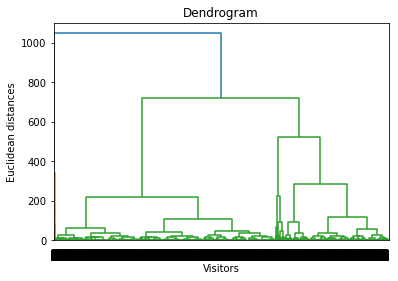

In [32]:
#lastp: The last p non-singleton clusters formed in the linkage are the only non-leaf nodes in the linkage
dendrogram_activate_date = dendrogram(link_activate_date)
plt.title('Dendrogram')
plt.xlabel('Visitors')
plt.ylabel('Euclidean distances')
plt.show()

In [33]:
#save linkage for later use
link_activate_date_df = pd.DataFrame(link_activate_date)
link_activate_date_df.to_csv('linkage_link_activate_date_ward.csv')

In [34]:
#merge activated date with full df_grouped
df_activate_grouped = df_grouped.merge(df_expire[['source_id', 'ActivatedDate']], on = 'source_id', how = 'left')
df_activate_grouped

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,ActivatedDate
0,5361,Gold,Adult,<1K,0,2020,11,1,2020-11-06 00:00:00.000
1,6604,Gold,Adult,>1K,0,2021,12,11,2020-12-11 00:00:00.000
2,7487,Gold,Adult,<1K,1,2021,12,8,2020-10-19 00:00:00.000
3,7914,Gold,Adult,<1K,0,2021,11,4,2020-11-26 00:00:00.000
4,8532,Gold,Adult,<1K,0,2021,11,4,2020-10-25 00:00:00.000
...,...,...,...,...,...,...,...,...,...
9896,354942,Gold,Adult,<1K,1,2021,12,15,2020-10-28 00:00:00.000
9897,354946,Gold,Adult,<1K,0,2021,10,1,2020-10-28 00:00:00.000
9898,354952,Gold,Adult,>1K,0,2021,12,5,2020-10-29 00:00:00.000
9899,354953,Gold,Adult,>1K,0,2021,12,7,2020-10-29 00:00:00.000


In [35]:
#merge activated date with full df
df_activate = df.merge(df_expire[['source_id', 'ActivatedDate']], on = 'source_id', how = 'left')
df_activate

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,ActivatedDate
0,5361,Gold,Adult,<1K,0,2020,11,1,2020-11-06 00:00:00.000
1,6604,Gold,Adult,>1K,0,2021,2,1,2020-12-11 00:00:00.000
2,6604,Gold,Adult,>1K,0,2021,7,1,2020-12-11 00:00:00.000
3,6604,Gold,Adult,>1K,0,2020,12,1,2020-12-11 00:00:00.000
4,6604,Gold,Adult,>1K,0,2021,5,1,2020-12-11 00:00:00.000
...,...,...,...,...,...,...,...,...,...
56808,354954,Gold,Adult,<1K,0,2020,11,1,2020-10-29 00:00:00.000
56809,354954,Gold,Adult,<1K,0,2021,10,1,2020-10-29 00:00:00.000
56810,354954,Gold,Adult,<1K,0,2021,8,1,2020-10-29 00:00:00.000
56811,354954,Gold,Adult,<1K,0,2021,2,1,2020-10-29 00:00:00.000


In [132]:
type(df_activate.iloc[0][8])

str

### sklearn.cluster.AgglomerativeClustering

In [36]:
from sklearn.cluster import AgglomerativeClustering

### d = 1

In [37]:
agg_cluster_d1 = AgglomerativeClustering(distance_threshold = 3, n_clusters = None).fit(link_activate_date)

In [38]:
df_aggcluster_act_1 = df_activate_grouped.copy()
df_aggcluster_act_1['cluster'] = pd.DataFrame(agg_cluster_d1.labels_)
# df_aggcluster_act_1['cluster'] = df_aggcluster_act_1['cluster'].apply(lambda x : int(x))
df_aggcluster_act_1

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,ActivatedDate,cluster
0,5361,Gold,Adult,<1K,0,2020,11,1,2020-11-06 00:00:00.000,8399.0
1,6604,Gold,Adult,>1K,0,2021,12,11,2020-12-11 00:00:00.000,45.0
2,7487,Gold,Adult,<1K,1,2021,12,8,2020-10-19 00:00:00.000,4921.0
3,7914,Gold,Adult,<1K,0,2021,11,4,2020-11-26 00:00:00.000,45.0
4,8532,Gold,Adult,<1K,0,2021,11,4,2020-10-25 00:00:00.000,5452.0
...,...,...,...,...,...,...,...,...,...,...
9896,354942,Gold,Adult,<1K,1,2021,12,15,2020-10-28 00:00:00.000,214.0
9897,354946,Gold,Adult,<1K,0,2021,10,1,2020-10-28 00:00:00.000,1230.0
9898,354952,Gold,Adult,>1K,0,2021,12,5,2020-10-29 00:00:00.000,176.0
9899,354953,Gold,Adult,>1K,0,2021,12,7,2020-10-29 00:00:00.000,289.0


In [39]:
df_aggcluster_act_1['cluster'].value_counts()

0.0       3
12.0      3
1.0       3
9.0       3
5.0       3
         ..
7924.0    1
6101.0    1
3389.0    1
9180.0    1
5867.0    1
Name: cluster, Length: 9510, dtype: int64

In [40]:
#####store results
df_aggcluster_act_1_grouped = pd.DataFrame(df_aggcluster_act_1.groupby('cluster')['source_id'].apply(list))
df_aggcluster_act_1_grouped

,source_id
cluster,
0.0,"[268884, 268887, 268894]"
1.0,"[269978, 269983, 269988]"
2.0,"[266875, 266877, 266881]"
3.0,"[255754, 270518]"
4.0,"[259325, 259326, 259356]"
...,...
9505.0,[67556]
9506.0,[252978]
9507.0,[252394]


In [41]:
df_aggcluster_act_1_grouped = pd.DataFrame(df_aggcluster_act_1_grouped['source_id'].tolist())
df_aggcluster_act_1_grouped

,0,1,2
0,268884,268887.0,268894.0
1,269978,269983.0,269988.0
2,266875,266877.0,266881.0
3,255754,270518.0,NaN
4,259325,259326.0,259356.0
...,...,...,...
9505,67556,NaN,NaN
9506,252978,NaN,NaN
9507,252394,NaN,NaN
9508,187809,NaN,NaN


In [42]:
df_aggcluster_act_1_grouped.to_csv('agg_cluster_d1.csv', index = False, header = False)

# -------------------------------------------------------------------------------------------
## Agglomerative Clustering: Updated

In [131]:
link_new = linkage(df_cluster_new_dummy, method  = "ward")

In [178]:
agg_new_d5 = AgglomerativeClustering(distance_threshold = 7, n_clusters = None).fit(link_new)

In [179]:
df_aggcluster_new_5 = df_cluster_new_dummy.copy()
df_aggcluster_new_5['cluster'] = pd.DataFrame(agg_new_d5.labels_)
# df_aggcluster_act_1['cluster'] = df_aggcluster_act_1['cluster'].apply(lambda x : int(x))
df_aggcluster_new_5

,source_id,is_renewal,use_time,Passtype_Diamond,Passtype_Gold,Passtype_Silver,cluster
0,5361,0,0.014117,0,1,0,40.0
1,6604,0,0.994574,0,1,0,21.0
2,7487,1,0.991874,0,1,0,90.0
3,7914,0,0.653952,0,1,0,7508.0
4,8532,0,0.577056,0,1,0,2551.0
...,...,...,...,...,...,...,...
9896,354942,1,0.994669,0,1,0,511.0
9897,354946,0,0.993750,0,1,0,575.0
9898,354952,0,0.933799,0,1,0,1535.0
9899,354953,0,0.980460,0,1,0,271.0


In [180]:
df_aggcluster_new_5['cluster'].value_counts()

1.0       4
0.0       3
362.0     3
40.0      3
446.0     3
         ..
3169.0    1
5441.0    1
7861.0    1
3420.0    1
1570.0    1
Name: cluster, Length: 8088, dtype: int64

In [181]:
#####store results
df_aggcluster_new_5_grouped = pd.DataFrame(df_aggcluster_new_5.groupby('cluster')['source_id'].apply(list))
df_aggcluster_new_5_grouped

,source_id
cluster,
0.0,"[43351, 43435, 260176]"
1.0,"[62649, 64393, 188413, 252923]"
2.0,"[51778, 251708, 262555]"
3.0,"[48532, 248203, 261616]"
4.0,"[276502, 279256]"
...,...
8083.0,[262877]
8084.0,[262761]
8085.0,[268773]


In [182]:
pd.DataFrame(df_aggcluster_new_5['cluster'].value_counts()).value_counts()

cluster
1          6635
2          1095
3           357
4             1
dtype: int64

# -------------------------------------------------------------------------------------------
## Validation: Updated

In [184]:
testing_data = pd.read_csv('wechat_group.csv', names = [0,1,2,3])
testing_data

,0,1,2,3
0,259183,53500,NaN,NaN
1,251084,251079,NaN,NaN
2,284757,277972,NaN,NaN
3,272049,272048,NaN,NaN
4,299998,299999,NaN,NaN
...,...,...,...,...
563,264780,264778,NaN,NaN
564,291134,291135,291136.0,NaN
565,284855,284853,NaN,NaN
566,288076,288077,NaN,NaN


In [188]:
agg_data_new = pd.read_csv('agg_new_d5.csv', names = [0,1,2])
agg_data_new

,0,1,2
0,251908,258021.0,260365.0
1,44484,57851.0,252533.0
2,248318,259468.0,261650.0
3,48416,266739.0,NaN
4,61765,262938.0,NaN
...,...,...,...
8526,261359,NaN,NaN
8527,64194,NaN,NaN
8528,259543,NaN,NaN
8529,263961,NaN,NaN


In [189]:
unique_groups_new_d5 = [df_aggcluster_new_5_grouped.loc[i][0] for i in range(len(df_aggcluster_new_5_grouped))]
wechat_group = [testing_data.loc[i].dropna().astype(int).tolist() for i in range(len(testing_data))]

In [190]:
group_set_new_d5 = set(map(tuple, unique_groups_new_d5))
wechat_set = set(map(tuple, wechat_group))
difference_set_d5 = group_set_new_d5.difference(wechat_set)
difference_set2_d5 = wechat_set.difference(group_set_new_d5)
print(len(group_set_new_d5), len(wechat_set), len(difference_set_d5), len(difference_set2_d5)) ######

8088 568 8088 568


In [191]:
print(1 - len(difference_set2_d5)/len(wechat_set))

0.0


In [192]:
# for group in wechat_group:
#   group.dropna(inplace = True)
wechat_group_list = [list(n) for n in wechat_group]

In [193]:
unique_groups_int = []
for group in unique_groups_new_d5:
  group = [int(x) for x in group]
  unique_groups_int.append(group)

In [194]:
group_set = set([frozenset(x) for x in unique_groups_int])
wechat_set = set([frozenset(x) for x in wechat_group])
difference_set = group_set.difference(wechat_set)
difference_set2 = wechat_set.difference(group_set)
print(len(group_set), len(wechat_set), len(difference_set), len(difference_set2))
print(1 - len(difference_set2)/len(wechat_set))

8088 568 8088 568
0.0


In [195]:
accuracy = {}
for group in unique_groups_new_d5:
  group = [int(x) for x in group]
  similarity_count = []
  set1 = set(group)
  for group2 in wechat_group_list:
    set2 = set(group2)
    difference_set = set2.difference(set1)
    similarity_count.append(1 - (len(difference_set)/len(set2)))
  accuracy[str(group)] = [max(similarity_count), str(list(wechat_group[similarity_count.index(max(similarity_count))]))]

In [196]:
partial_correct = []
for value in list(accuracy.values()):
  if value[0] < 1:
    partial_correct.append(value)

In [197]:
sum = 0
for value in list(accuracy.values()):
  sum += value[0]
avg_accuracy = sum/len(accuracy)
print(avg_accuracy)

0.06876442466205072


In [33]:
with open('AP Expire header.txt') as f:
    lines = f.read().splitlines() 
    line = lines[0]
    
header = line.split("\t")

df_expire = pd.read_csv('AP Expired_20211101_20220131.csv', sep=',', header=None)
df_expire.columns = header
df_expire = df_expire.drop([0,0])
df_expire.head()

,source_id,Passtype,is_renewal,ActivatedDate,exp_date,binding_wechat_open_id_num,binding_wechat_time,first_wechat_open_id_num,first_binding_time
1,260624,Gold,NaN,2020-11-03 00:00:00.000,2021-11-17 00:00:00.000,166300,2020-11-08 13:19:49.000,166300,2020-11-08 13:19:49.000
2,272132,Crystal,1,2020-11-17 00:00:00.000,2021-12-01 00:00:00.000,118364,2020-11-22 14:47:12.000,118364,2020-11-22 14:47:12.000
3,283663,Crystal,NaN,2020-12-24 00:00:00.000,2022-01-07 00:00:00.000,192688,2021-03-10 15:05:33.000,192688,2021-03-10 15:05:33.000
4,47189,Diamond,1,2020-10-31 00:00:00.000,2021-11-14 00:00:00.000,174004,2020-10-31 00:15:04.000,174004,2020-10-31 00:15:04.000
5,64398,Diamond,1,2020-12-17 00:00:00.000,2021-12-31 00:00:00.000,211734,2021-10-30 14:32:39.000,211734,2021-10-30 14:32:39.000


In [38]:
df_expire['source_id'] = df_expire['source_id'].apply(lambda x: int(x))

In [45]:
# pd.merge(df_grouped, df_expire, on = ['source_id'])
df_filteredByWechat = df_grouped.merge(df_expire[['source_id']], on = 'source_id', how = 'right')

In [48]:
df_filteredByWechat

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times
0,260624,Gold,Adult,0,0.0,2021.0,11.0,9.0
1,272132,Crystal,Adult,>1K,1.0,2021.0,12.0,6.0
2,283663,Crystal,Adult,0,0.0,2021.0,3.0,1.0
3,47189,Diamond,Adult,>1K,1.0,2021.0,12.0,60.0
4,64398,Diamond,Adult,>5K,1.0,2021.0,12.0,20.0
...,...,...,...,...,...,...,...,...
9995,268302,Gold,Adult,<1K,1.0,2021.0,10.0,3.0
9996,276656,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,299963,Crystal,Adult,<1K,0.0,2021.0,8.0,6.0
9998,283184,Crystal,Adult,>5K,0.0,2021.0,12.0,5.0


# -------------------------------------------------------------------------------------------
# -------------------------------------------------------------------------------------------

#### validation - compare with wechat_group

In [43]:
testing_data = pd.read_csv('wechat_group.csv', names = [0,1,2,3])
testing_data

,0,1,2,3
0,259183,53500,NaN,NaN
1,251084,251079,NaN,NaN
2,284757,277972,NaN,NaN
3,272049,272048,NaN,NaN
4,299998,299999,NaN,NaN
...,...,...,...,...
563,264780,264778,NaN,NaN
564,291134,291135,291136.0,NaN
565,284855,284853,NaN,NaN
566,288076,288077,NaN,NaN


In [44]:
agg_data = pd.read_csv('agg_cluster_d1.csv', names = [0,1,2])
agg_data

,0,1,2
0,268884,268887.0,268894.0
1,269978,269983.0,269988.0
2,266875,266877.0,266881.0
3,255754,270518.0,NaN
4,259325,259326.0,259356.0
...,...,...,...
9505,67556,NaN,NaN
9506,252978,NaN,NaN
9507,252394,NaN,NaN
9508,187809,NaN,NaN


In [45]:
# unique_groups = [df_aggcluster_act_1_grouped.loc[i][0] for i in range(len(df_aggcluster_act_1_grouped))]
unique_groups = [agg_data.loc[i].dropna().astype(int).tolist() for i in range(len(agg_data))]
wechat_group = [testing_data.loc[i].dropna().astype(int).tolist() for i in range(len(testing_data))]

In [46]:
group_set = set(map(tuple, unique_groups))
wechat_set = set(map(tuple, wechat_group))
difference_set = group_set.difference(wechat_set)
difference_set2 = wechat_set.difference(group_set)
print(len(group_set), len(wechat_set), len(difference_set), len(difference_set2)) ####### 2

9510 568 9508 566


### d = 2

In [57]:
agg_cluster_d2 = AgglomerativeClustering(distance_threshold = 2, n_clusters = None).fit(link_activate_date)
df_aggcluster_act_2 = df_activate_grouped.copy()
df_aggcluster_act_2['cluster'] = pd.DataFrame(agg_cluster_d2.labels_)
df_aggcluster_act_2

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,ActivatedDate,cluster
0,5361,Gold,Adult,<1K,0,2020,11,1,2020-11-06 00:00:00.000,8399.0
1,6604,Gold,Adult,>1K,0,2021,12,11,2020-12-11 00:00:00.000,9539.0
2,7487,Gold,Adult,<1K,1,2021,12,8,2020-10-19 00:00:00.000,4921.0
3,7914,Gold,Adult,<1K,0,2021,11,4,2020-11-26 00:00:00.000,7900.0
4,8532,Gold,Adult,<1K,0,2021,11,4,2020-10-25 00:00:00.000,5452.0
...,...,...,...,...,...,...,...,...,...,...
9896,354942,Gold,Adult,<1K,1,2021,12,15,2020-10-28 00:00:00.000,214.0
9897,354946,Gold,Adult,<1K,0,2021,10,1,2020-10-28 00:00:00.000,152.0
9898,354952,Gold,Adult,>1K,0,2021,12,5,2020-10-29 00:00:00.000,176.0
9899,354953,Gold,Adult,>1K,0,2021,12,7,2020-10-29 00:00:00.000,144.0


In [58]:
df_aggcluster_act_2['cluster'].value_counts()

0.0       2
240.0     2
4.0       2
482.0     2
114.0     2
         ..
2912.0    1
5798.0    1
2611.0    1
1635.0    1
5867.0    1
Name: cluster, Length: 9684, dtype: int64

In [59]:
#####store results
df_aggcluster_act_2_grouped = pd.DataFrame(df_aggcluster_act_2.groupby('cluster')['source_id'].apply(list))
df_aggcluster_act_2_grouped

,source_id
cluster,
0.0,"[271958, 271960]"
1.0,"[271728, 271732]"
2.0,"[270750, 270755]"
3.0,"[270633, 270636]"
4.0,"[268884, 268887]"
...,...
9679.0,[252891]
9680.0,[51331]
9681.0,[47366]


In [60]:
unique_groups = [df_aggcluster_act_2_grouped.loc[i][0] for i in range(len(df_aggcluster_act_2_grouped))]
wechat_group = [testing_data.loc[i].dropna().astype(int).tolist() for i in range(len(testing_data))]

In [61]:
group_set = set(map(tuple, unique_groups))
wechat_set = set(map(tuple, wechat_group))
difference_set = group_set.difference(wechat_set)
difference_set2 = wechat_set.difference(group_set)
print(len(group_set), len(wechat_set), len(difference_set), len(difference_set2)) ###### 3

9684 568 9681 565


In [198]:
unique_groups_d2 = [df_aggcluster_act_2_grouped.loc[i][0] for i in range(len(df_aggcluster_act_2_grouped))]

In [199]:
accuracy = {}
for group in unique_groups_d2:
  group = [int(x) for x in group]
  similarity_count = []
  set1 = set(group)
  for group2 in wechat_group_list:
    set2 = set(group2)
    difference_set = set2.difference(set1)
    similarity_count.append(1 - (len(difference_set)/len(set2)))
  accuracy[str(group)] = [max(similarity_count), str(list(wechat_group[similarity_count.index(max(similarity_count))]))]

In [200]:
partial_correct = []
for value in list(accuracy.values()):
  if value[0] < 1:
    partial_correct.append(value)

sum = 0
for value in list(accuracy.values()):
  sum += value[0]
avg_accuracy = sum/len(accuracy)
print(avg_accuracy)

0.05834365964477485


### d = 3

In [62]:
agg_cluster_d3 = AgglomerativeClustering(distance_threshold = 3, n_clusters = None).fit(link_activate_date)
df_aggcluster_act_3 = df_activate_grouped.copy()
df_aggcluster_act_3['cluster'] = pd.DataFrame(agg_cluster_d3.labels_)
df_aggcluster_act_3

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,ActivatedDate,cluster
0,5361,Gold,Adult,<1K,0,2020,11,1,2020-11-06 00:00:00.000,8399.0
1,6604,Gold,Adult,>1K,0,2021,12,11,2020-12-11 00:00:00.000,45.0
2,7487,Gold,Adult,<1K,1,2021,12,8,2020-10-19 00:00:00.000,4921.0
3,7914,Gold,Adult,<1K,0,2021,11,4,2020-11-26 00:00:00.000,45.0
4,8532,Gold,Adult,<1K,0,2021,11,4,2020-10-25 00:00:00.000,5452.0
...,...,...,...,...,...,...,...,...,...,...
9896,354942,Gold,Adult,<1K,1,2021,12,15,2020-10-28 00:00:00.000,214.0
9897,354946,Gold,Adult,<1K,0,2021,10,1,2020-10-28 00:00:00.000,1230.0
9898,354952,Gold,Adult,>1K,0,2021,12,5,2020-10-29 00:00:00.000,176.0
9899,354953,Gold,Adult,>1K,0,2021,12,7,2020-10-29 00:00:00.000,289.0


In [63]:
df_aggcluster_act_3['cluster'].value_counts()

0.0       3
12.0      3
1.0       3
9.0       3
5.0       3
         ..
7924.0    1
6101.0    1
3389.0    1
9180.0    1
5867.0    1
Name: cluster, Length: 9510, dtype: int64

In [64]:
#####store results
df_aggcluster_act_3_grouped = pd.DataFrame(df_aggcluster_act_3.groupby('cluster')['source_id'].apply(list))
df_aggcluster_act_3_grouped

,source_id
cluster,
0.0,"[268884, 268887, 268894]"
1.0,"[269978, 269983, 269988]"
2.0,"[266875, 266877, 266881]"
3.0,"[255754, 270518]"
4.0,"[259325, 259326, 259356]"
...,...
9505.0,[67556]
9506.0,[252978]
9507.0,[252394]


In [65]:
unique_groups3 = [df_aggcluster_act_3_grouped.loc[i][0] for i in range(len(df_aggcluster_act_3_grouped))]
wechat_group3 = [testing_data.loc[i].dropna().astype(int).tolist() for i in range(len(testing_data))]

In [66]:
group_set3 = set(map(tuple, unique_groups3))
wechat_set3 = set(map(tuple, wechat_group3))
difference_set3 = group_set.difference(wechat_set3)
difference_set3_2 = wechat_set.difference(group_set3)
print(len(group_set3), len(wechat_set3), len(difference_set3), len(difference_set3_2)) ###### 3

9510 568 9681 566


### scipy.cluster.hierarchy.fcluster
### d = 1

In [67]:
fcluster_act_1 = fcluster(link_activate_date, t=1, criterion='distance')
fcluster_act_1 = pd.DataFrame(fcluster_act_1)
df_fcluster_act_1 = df_activate_grouped.copy()
df_fcluster_act_1['cluster'] = fcluster_act_1
df_fcluster_act_1

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,ActivatedDate,cluster
0,5361,Gold,Adult,<1K,0,2020,11,1,2020-11-06 00:00:00.000,49
1,6604,Gold,Adult,>1K,0,2021,12,11,2020-12-11 00:00:00.000,429
2,7487,Gold,Adult,<1K,1,2021,12,8,2020-10-19 00:00:00.000,188
3,7914,Gold,Adult,<1K,0,2021,11,4,2020-11-26 00:00:00.000,91
4,8532,Gold,Adult,<1K,0,2021,11,4,2020-10-25 00:00:00.000,92
...,...,...,...,...,...,...,...,...,...,...
9896,354942,Gold,Adult,<1K,1,2021,12,15,2020-10-28 00:00:00.000,454
9897,354946,Gold,Adult,<1K,0,2021,10,1,2020-10-28 00:00:00.000,50
9898,354952,Gold,Adult,>1K,0,2021,12,5,2020-10-29 00:00:00.000,137
9899,354953,Gold,Adult,>1K,0,2021,12,7,2020-10-29 00:00:00.000,160


In [68]:
df_fcluster_act_1['cluster'].value_counts()

94     150
136    131
92     131
133    130
137    129
      ... 
194      1
26       1
197      1
213      1
8        1
Name: cluster, Length: 491, dtype: int64

In [69]:
#observe clusters (not the best way)
df_fcluster_act_1 = df_fcluster_act_1.sort_values('cluster')
df_fcluster_act_1.iloc[50:70]

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,ActivatedDate,cluster
398,44967,Silver,Select,<1K,0,2021,10,2,2020-10-28 00:00:00.000,33
130,40015,Silver,Adult,0,0,2021,11,2,2020-10-20 00:00:00.000,33
13,17118,Silver,Adult,0,0,2020,12,2,2020-10-26 00:00:00.000,33
740,51814,Silver,Adult,>1K,0,2021,12,2,2020-11-11 00:00:00.000,33
447,45882,Silver,Adult,<1K,0,2021,11,2,2020-11-01 00:00:00.000,33
2488,252969,Diamond,Adult,>1K,0,2021,10,2,2020-10-24 00:00:00.000,34
174,40742,Diamond,Adult,<1K,0,2021,10,2,2020-10-21 00:00:00.000,34
2864,256687,Diamond,Adult,<1K,0,2021,5,2,2020-10-29 00:00:00.000,34
2388,252419,Diamond,Adult,<1K,0,2021,12,2,2020-10-24 00:00:00.000,34
9868,354775,Diamond,Adult,<1K,0,2021,7,2,2020-10-28 00:00:00.000,34


In [70]:
#observe clusters (a BETTER way)
df_activate_d1 = df_activate.merge(df_fcluster_act_1[['source_id', 'cluster']], on = 'source_id', how = 'left')
df_act_merge_d1_sorted = df_activate_d1.sort_values('cluster')
df_act_merge_d1_sorted.loc[df_act_merge_d1_sorted['cluster']==40].sort_values(['source_id', 'year', 'month'])

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,ActivatedDate,cluster
257,36166,Crystal,Adult,>10K,0,2020,12,1,2020-12-19 00:00:00.000,40
31673,271581,Crystal,Adult,0,0,2021,4,1,2020-11-16 00:00:00.000,40
32644,272162,Crystal,Adult,<1K,0,2021,1,1,2020-11-17 00:00:00.000,40
32645,272163,Crystal,Select,0,0,2021,1,1,2020-11-17 00:00:00.000,40
33043,272515,Crystal,Adult,<1K,0,2020,12,1,2020-11-03 00:00:00.000,40
33176,272650,Crystal,Adult,<1K,0,2021,1,1,2020-11-19 00:00:00.000,40
35072,274105,Crystal,Adult,0,0,2021,10,1,2020-11-12 00:00:00.000,40
35194,274215,Crystal,Adult,0,0,2020,11,1,2020-11-28 00:00:00.000,40
36140,275000,Crystal,Adult,<1K,0,2020,12,1,2020-11-30 00:00:00.000,40
36473,275256,Crystal,Adult,0,0,2020,12,1,2020-12-01 00:00:00.000,40


# test obervation on source_id = 287513

In [71]:
test_df = df_act_merge_d1_sorted.copy()
test_df
# df_act_merge_d1_sorted.loc[df_act_merge_d1_sorted['source_id']==287510]

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,ActivatedDate,cluster
7168,59016,Diamond,Adult,>5K,1,2021,4,8,2020-11-28 00:00:00.000,1
7171,59016,Diamond,Adult,>5K,1,2020,12,17,2020-11-28 00:00:00.000,1
7172,59016,Diamond,Adult,>5K,1,2021,2,15,2020-11-28 00:00:00.000,1
7173,59016,Diamond,Adult,>5K,1,2021,9,15,2020-11-28 00:00:00.000,1
7174,59016,Diamond,Adult,>5K,1,2021,5,16,2020-11-28 00:00:00.000,1
...,...,...,...,...,...,...,...,...,...,...
34566,273808,Crystal,Adult,<1K,1,2021,8,2,2020-11-26 00:00:00.000,491
34567,273808,Crystal,Adult,<1K,1,2021,3,1,2020-11-26 00:00:00.000,491
34568,273808,Crystal,Adult,<1K,1,2021,4,1,2020-11-26 00:00:00.000,491
40092,278310,Crystal,Adult,<1K,1,2020,12,2,2020-12-10 00:00:00.000,491


In [72]:
test_df['ActivatedDate'] = pd.to_datetime(test_df['ActivatedDate'], format='%Y-%m-%dT%H:%M:%S')
test_df['ActivatedDate'] = test_df['ActivatedDate'].apply(lambda x: int(x.value))
test_df

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,ActivatedDate,cluster
7168,59016,Diamond,Adult,>5K,1,2021,4,8,1606521600000000000,1
7171,59016,Diamond,Adult,>5K,1,2020,12,17,1606521600000000000,1
7172,59016,Diamond,Adult,>5K,1,2021,2,15,1606521600000000000,1
7173,59016,Diamond,Adult,>5K,1,2021,9,15,1606521600000000000,1
7174,59016,Diamond,Adult,>5K,1,2021,5,16,1606521600000000000,1
...,...,...,...,...,...,...,...,...,...,...
34566,273808,Crystal,Adult,<1K,1,2021,8,2,1606348800000000000,491
34567,273808,Crystal,Adult,<1K,1,2021,3,1,1606348800000000000,491
34568,273808,Crystal,Adult,<1K,1,2021,4,1,1606348800000000000,491
40092,278310,Crystal,Adult,<1K,1,2020,12,2,1607558400000000000,491


In [73]:
t = test_df[test_df['source_id']==287513]['ActivatedDate']
t = int(t)

In [74]:
t

1608422400000000000

In [75]:
test_df[(test_df['ActivatedDate']==t) & (test_df['month']==5) & (test_df['year']==2021) & (test_df['is_renewal']==0) & (test_df['Passtype']=='Crystal')]
#21-5 :1, 20-12-20, 287513
#14 rows

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,ActivatedDate,cluster
49198,287513,Crystal,Select,0,0,2021,5,1,1608422400000000000,40
44293,281893,Crystal,Adult,>1K,0,2021,5,1,1608422400000000000,119
44350,281971,Crystal,Adult,0,0,2021,5,1,1608422400000000000,119
44353,281972,Crystal,Adult,0,0,2021,5,1,1608422400000000000,119
44334,281951,Crystal,Adult,<1K,0,2021,5,1,1608422400000000000,122
44405,282010,Crystal,Select,0,0,2021,5,1,1608422400000000000,122
44393,282004,Crystal,Adult,>5K,0,2021,5,1,1608422400000000000,156
44362,281985,Crystal,Adult,<1K,0,2021,5,1,1608422400000000000,167
44204,281823,Crystal,Select,0,0,2021,5,1,1608422400000000000,167
44154,281781,Crystal,Adult,0,0,2021,5,1,1608422400000000000,169


In [76]:
testList = list(test_df[(test_df['ActivatedDate']==t) & (test_df['month']==5) & (test_df['year']==2021) & (test_df['is_renewal']==0) & (test_df['Passtype']=='Crystal')]['source_id'])
testList

[287513,
 281893,
 281971,
 281972,
 281951,
 282010,
 282004,
 281985,
 281823,
 281781,
 282033,
 281727,
 281842,
 287491]

In [77]:
test_df[test_df['source_id'].isin(testList)].head(30)

,source_id,Passtype,Age,MerchSpendLevel,is_renewal,year,month,visit_times,ActivatedDate,cluster
49198,287513,Crystal,Select,0,0,2021,5,1,1608422400000000000,40
44293,281893,Crystal,Adult,>1K,0,2021,5,1,1608422400000000000,119
44294,281893,Crystal,Adult,>1K,0,2021,2,1,1608422400000000000,119
44292,281893,Crystal,Adult,>1K,0,2020,12,1,1608422400000000000,119
44291,281893,Crystal,Adult,>1K,0,2021,4,2,1608422400000000000,119
44350,281971,Crystal,Adult,0,0,2021,5,1,1608422400000000000,119
44351,281972,Crystal,Adult,0,0,2021,10,1,1608422400000000000,119
44352,281972,Crystal,Adult,0,0,2021,1,1,1608422400000000000,119
44353,281972,Crystal,Adult,0,0,2021,5,1,1608422400000000000,119
44349,281971,Crystal,Adult,0,0,2021,10,1,1608422400000000000,119


### d = 0.5

In [78]:
fcluster_act_05 = fcluster(link_activate_date, t=0.5, criterion='distance')
fcluster_act_05 = pd.DataFrame(fcluster_act_05)
df_fcluster_act_05 = df_activate_grouped.copy()
df_fcluster_act_05['cluster'] = fcluster_act_05
# df_fcluster_act_1
df_fcluster_act_05['cluster'].value_counts()

191    131
592     89
175     84
184     83
235     82
      ... 
291      1
329      1
520      1
609      1
8        1
Name: cluster, Length: 689, dtype: int64

In [79]:
fcluster_act_01 = fcluster(link_activate_date, t=0.1, criterion='distance')
fcluster_act_01 = pd.DataFrame(fcluster_act_01)
df_fcluster_act_01 = df_activate_grouped.copy()
df_fcluster_act_01['cluster'] = fcluster_act_01
# df_fcluster_act_1
df_fcluster_act_01['cluster'].value_counts()

456     52
657     48
572     45
1273    43
424     43
        ..
686      1
678      1
1020     1
1044     1
8        1
Name: cluster, Length: 1515, dtype: int64

In [80]:
fcluster_act_001 = fcluster(link_activate_date, t=0.01, criterion='distance')
fcluster_act_001 = pd.DataFrame(fcluster_act_001)
df_fcluster_act_001 = df_activate_grouped.copy()
df_fcluster_act_001['cluster'] = fcluster_act_001
# df_fcluster_act_1
df_fcluster_act_001['cluster'].value_counts()

1469    32
2185    31
1842    28
3904    26
1292    25
        ..
1341     1
3388     1
1881     1
1889     1
1621     1
Name: cluster, Length: 4169, dtype: int64

In [81]:
fcluster_act_0001 = fcluster(link_activate_date, t=0.001, criterion='distance')
fcluster_act_0001 = pd.DataFrame(fcluster_act_0001)
df_fcluster_act_0001 = df_activate_grouped.copy()
df_fcluster_act_0001['cluster'] = fcluster_act_0001
# df_fcluster_act_1
df_fcluster_act_0001['cluster'].value_counts()

1593    32
2369    31
1996    28
4273    26
1403    25
        ..
2794     1
2802     1
2810     1
771      1
2047     1
Name: cluster, Length: 4572, dtype: int64

In [82]:
fcluster_act_00001 = fcluster(link_activate_date, t=0.0001, criterion='distance')
fcluster_act_00001 = pd.DataFrame(fcluster_act_00001)
df_fcluster_act_00001 = df_activate_grouped.copy()
df_fcluster_act_00001['cluster'] = fcluster_act_00001
# df_fcluster_act_1
df_fcluster_act_00001['cluster'].value_counts()

1593    32
2369    31
1996    28
4273    26
1403    25
        ..
2794     1
2802     1
2810     1
771      1
2047     1
Name: cluster, Length: 4572, dtype: int64

In [83]:
fcluster_act_0000001 = fcluster(link_activate_date, t=0.000001, criterion='distance')
fcluster_act_0000001 = pd.DataFrame(fcluster_act_0000001)
df_fcluster_act_0000001 = df_activate_grouped.copy()
df_fcluster_act_0000001['cluster'] = fcluster_act_0000001
# df_fcluster_act_1
df_fcluster_act_0000001['cluster'].value_counts()

1593    32
2369    31
1996    28
4273    26
1403    25
        ..
2794     1
2802     1
2810     1
771      1
2047     1
Name: cluster, Length: 4572, dtype: int64